In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=100)
outliers = np.random.normal(loc=15, scale=5, size=10)

# Combine normal data with outliers
data = np.concatenate((normal_data, outliers))

In [15]:
range_1 = np.random.randint(low=0, high=95, size=100)
range_2 = np.random.randint(low=95, high=100, size=10)

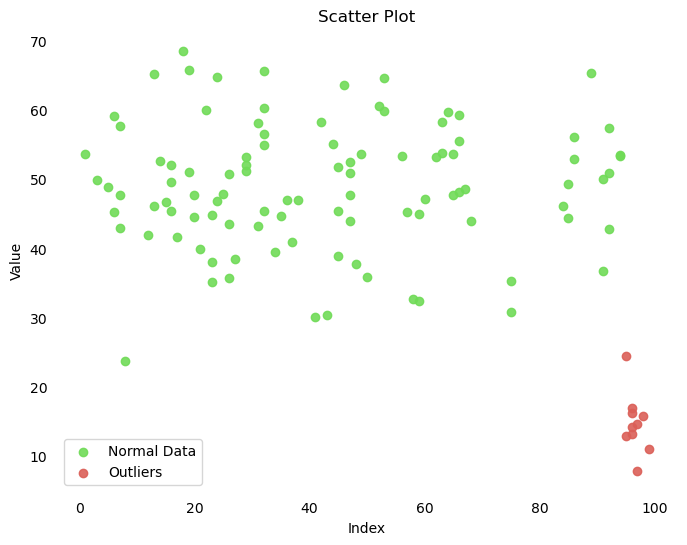

In [16]:
# Visualize data using a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range_1, normal_data, color=sns.color_palette("hls",24)[7], alpha=.9, label='Normal Data')
ax.scatter(range_2, outliers, color=sns.color_palette("hls",24)[0], alpha=.9, label='Outliers')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Scatter Plot')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend()
plt.show()

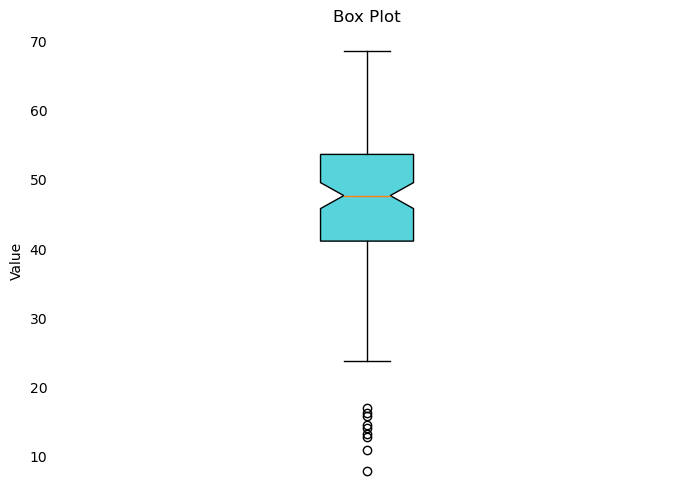

In [17]:
# Visualize data using a box plot
fig, ax = plt.subplots(figsize=(8, 6))
b_plot = ax.boxplot(data, vert=True, patch_artist=True, notch=True)
ax.set_ylabel('Value')
ax.set_title('Box Plot')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks([])
# Color the box
for box in b_plot['boxes']:
    box.set_facecolor(sns.color_palette("hls",24)[12])

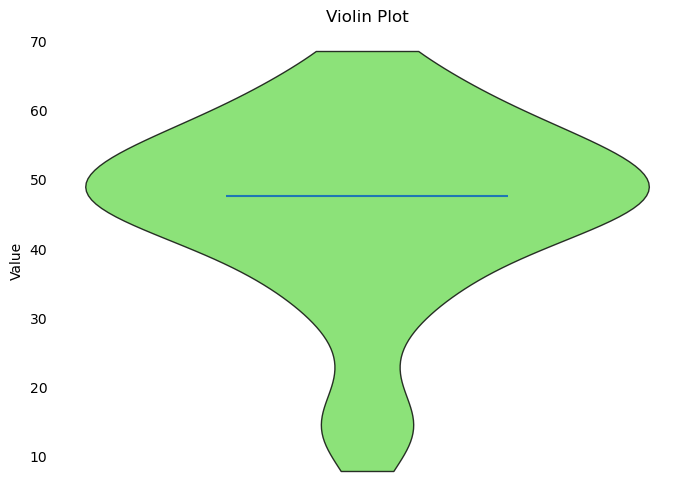

In [18]:
# Visualize data using a violin plot
fig, ax = plt.subplots(figsize=(8, 6))
v_plot = ax.violinplot(data, vert=True, showmedians=True, showextrema=False)
ax.set_ylabel('Value')
ax.set_title('Violin Plot')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks([])
# Color the violin
for pc in v_plot['bodies']:
    pc.set_facecolor(sns.color_palette("hls",24)[7])
    pc.set_edgecolor('black')
    pc.set_alpha(.8)

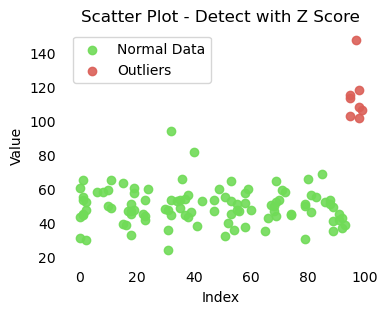

In [35]:
# Detect outliers with z scores
# Generate a random dataset with outliers (100 normal points and 10 outliers)
np.random.seed(42)
data = np.concatenate((np.random.normal(loc=50, scale=10, size=100), 
                        np.random.normal(loc=110, scale=20, size=10)))

# Calculate mean and standard deviation
mean_data = np.mean(data)
std_dev = np.std(data)

# Set Z-score threshold (typically 2 or 3)
z_score_threshold = 2

# Identify outliers using Z-score
outliers = [value for value in data if (value - mean_data) / std_dev > z_score_threshold]
normal_data = [value for value in data if (value - mean_data) / std_dev <= z_score_threshold]

range_1 = np.random.randint(low=0, high=95, size=len(normal_data))
range_2 = np.random.randint(low=95, high=100, size=len(outliers))

fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(range_1, normal_data, color=sns.color_palette("hls",24)[7], alpha=.9, label='Normal Data')
ax.scatter(range_2, outliers, color=sns.color_palette("hls",24)[0], alpha=.9, label='Outliers')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Scatter Plot - Detect with Z Score')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend()
plt.show()

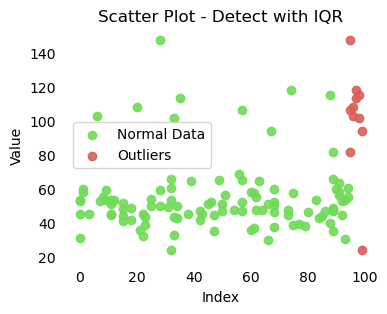

In [37]:
# Detect outliers with IQR
# Generate a random dataset with outliers (100 normal points and 10 outliers)
# np.random.seed(42)
# data = np.concatenate((np.random.normal(loc=50, scale=10, size=100), 
#                         np.random.normal(loc=110, scale=20, size=10)))

# Calculate Q1 and Q3
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Set lower and upper bounds for outliers
# k is generally b/w 1.5 and 3.0
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR method
outliers = [value for value in data if value < lower_bound or value > upper_bound]
normal_data = [value for value in data if value >= lower_bound or value <= upper_bound]

range_1 = np.random.randint(low=0, high=95, size=len(normal_data))
range_2 = np.random.randint(low=95, high=100, size=len(outliers))

fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(range_1, normal_data, color=sns.color_palette("hls",24)[7], alpha=.9, label='Normal Data')
ax.scatter(range_2, outliers, color=sns.color_palette("hls",24)[0], alpha=.9, label='Outliers')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Scatter Plot - Detect with IQR')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend()
plt.show()

In [23]:
# Isolation Forest
from sklearn.ensemble import IsolationForest
import numpy as np

# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=10000)
outliers = np.random.normal(loc=20, scale=5, size=1000)
data = np.concatenate((normal_data, outliers)).reshape(-1, 1)

np.random.shuffle(data)

# Apply Isolation Forest for outlier detection
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(data)

# Predict outliers
outlier_preds = clf.predict(data)
outliers_indices = np.where(outlier_preds == -1)

In [38]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=10000)
outliers = np.random.normal(loc=20, scale=5, size=1000)
data = np.concatenate((normal_data, outliers)).reshape(-1, 1)

np.random.shuffle(data)

# Apply Local Outlier Factor (LOF) for outlier detection
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_preds = clf.fit_predict(data)

# Identify outlier indices
outliers_indices = np.where(outlier_preds == -1)

In [ ]:
# https://towardsdatascience.com/outlier-detection-with-scikit-learn-and-matplotlib-a-practical-guide-382d1411b8ec